In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import folium
from folium import plugins
import json

import plotly
import cufflinks as cf
import plotly.express as px

# 오프라인 모드에서도 인터렉티브한 그래픽을 가능하도록 함
from plotly.offline import download_plotlyjs,init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

# 다중 그래프 그리기
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 한글 패치
from matplotlib import rc
rc('font', family='AppleGothic')

# 통계 분석
import scipy.stats

In [4]:
input_path = './input/'

In [5]:
# 데이터 로드
burger_df = pd.read_csv(input_path+'burger_df.csv')
nstore_df = pd.read_csv(input_path+'nstore_df.csv')
nstore_stat_df = pd.read_csv(input_path+'nstore_stat_df.csv')

burger_df.shape, nstore_df.shape, nstore_stat_df.shape

((2306, 6), (240, 9), (17, 13))

In [7]:
burger_df.head()

,지점명,주소,브랜드,주소1,주소2,주소3
0,선릉역점,서울특별시 강남구 선릉로 429,버거킹,서울특별시,강남구,선릉로 429
1,대치역점,서울특별시 강남구 남부순환로 2936,버거킹,서울특별시,강남구,남부순환로 2936
2,차병원사거리점,서울특별시 강남구 봉은사로 179,버거킹,서울특별시,강남구,봉은사로 179
3,강남도곡점,서울특별시 강남구 논현로 172 (도곡동 410-10) 1층,버거킹,서울특별시,강남구,논현로 172 (도곡동 410-10) 1층
4,청담점,서울특별시 강남구 선릉로 812,버거킹,서울특별시,강남구,선릉로 812


In [8]:
nstore_df.head()

,버거킹,KFC,맥도날드,롯데리아,BKM,버거지수,주소,주소1,주소2
0,1,0,1,6,2,0.333333,강원도 강릉시,강원도,강릉시
1,1,0,1,3,2,0.666667,강원도 속초시,강원도,속초시
2,3,1,2,15,6,0.400000,강원도 원주시,강원도,원주시
3,2,2,2,7,6,0.857143,강원도 춘천시,강원도,춘천시
4,2,0,0,2,2,1.000000,강원도 홍천군,강원도,홍천군


In [9]:
nstore_stat_df.head()

,버거킹,KFC,맥도날드,롯데리아,BKM,버거지수,시도별,1인당 지역내총생산,1인당 지역총소득,1인당 개인소득,1인당 민간소비,인구,인구밀도
0,9,3,7,54,19,0.351852,강원도,32061,29392,18997,16811,1521,90
1,100,50,96,317,246,0.776025,경기도,36133,38466,20482,17399,12786,1255
2,24,4,29,87,57,0.655172,경상남도,33690,32140,18939,16426,3339,317
3,25,4,15,68,44,0.647059,경상북도,40272,34873,18611,16217,2675,141
4,15,3,10,42,28,0.666667,광주광역시,27548,30964,20532,18231,1495,2984


## 버거지수와 경제지표와의 상관관계

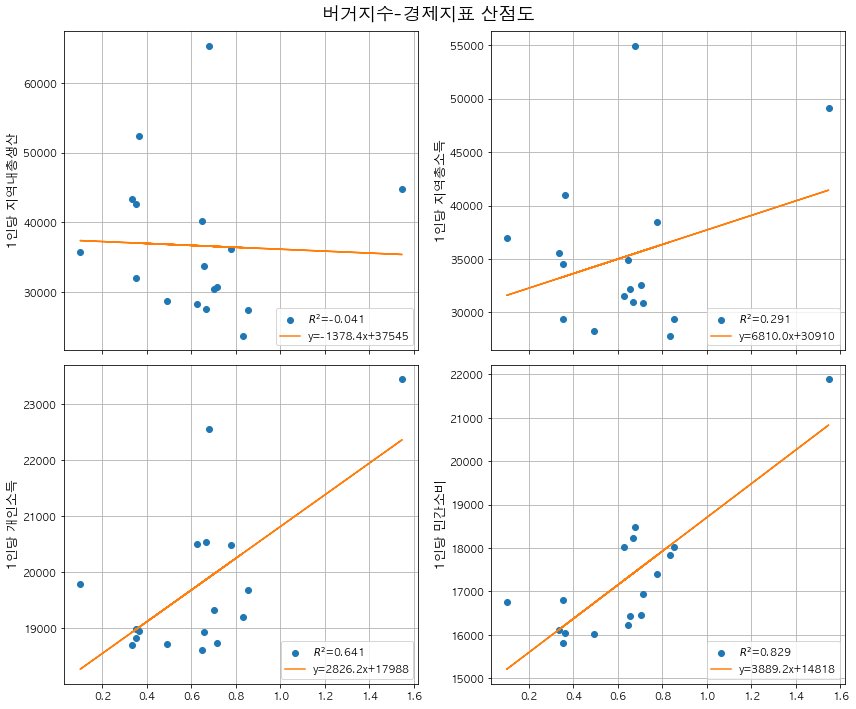

In [10]:
x = nstore_stat_df["버거지수"]
col_label = ['1인당 지역내총생산', '1인당 지역총소득','1인당 개인소득', '1인당 민간소비']

fig, axes = plt.subplots(2,2, figsize=(12,10), sharex=True)

ncol = 0
for i in range(2):
    for j in range(2):
        ax = axes[i][j]
        y_label = col_label[ncol]
        y = np.array(nstore_stat_df[y_label].tolist())
        
        z = np.polyfit(x,y,1)
        f = np.poly1d(z)
        
        R = np.corrcoef(x, y)[0][1]
        
        ax.plot(x, y,'o', label=r'$R^{2}$'+'={:.3f}'.format(R))
        ax.plot(x, f(x), label='y={:.1f}x+{:.0f}'.format(z[0],z[1]))
        ax.set_ylabel(y_label, fontsize=13)
        ax.grid(True)
        ax.legend(loc=4)

        ncol += 1

plt.suptitle("버거지수-경제지표 산점도", fontsize=18)
plt.tight_layout()

[comments] 
- 경제 지표별로 회귀선 차이가 꽤 난다. 경제지표가 무엇을 의미하는지를 알아야지 해석이 가능할 것 같다. 최대한 많은 시각화 자료를 만들고 해석은 조원들과 나누면서 결정하자

False
False


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 8722 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 8722 missing from current font.



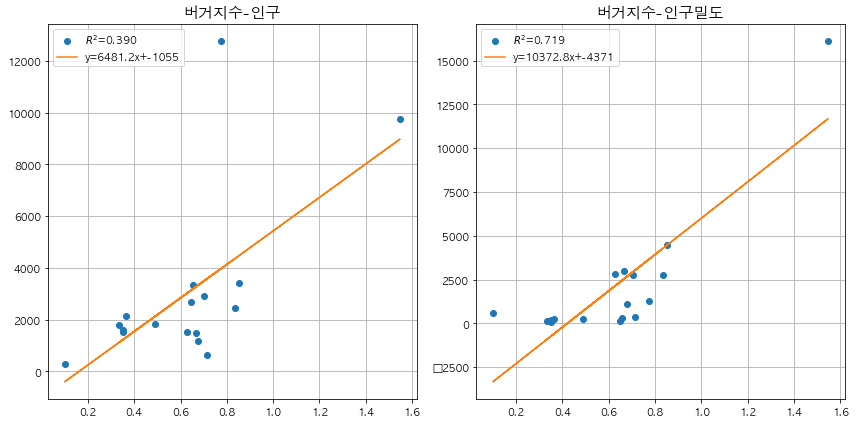

In [12]:
x = nstore_stat_df["버거지수"]
col_label = ["인구", "인구밀도"]

fig, axes = plt.subplots(1,2, figsize=(12,6))

for i in range(2):
    ax = axes[i]
    y_label = col_label[i]
    y = nstore_stat_df[y_label]
    
    z = np.polyfit(x,y,1)
    f = np.poly1d(z)
    
    R = np.corrcoef(x,y)[0,1]
    r = scipy.stats.pearsonr(x,y)[0]
    print(R==r)
    
    ax.plot(x, y,'o', label=r'$R^{2}$'+'={:.3f}'.format(R**2))
    ax.plot(x, f(x), label='y={:.1f}x+{:.0f}'.format(z[0],z[1]))
    ax.set_title("버거지수-"+y_label, fontsize=15)
    ax.grid(True)
    ax.legend(loc=2)
    
plt.tight_layout()

In [15]:
px.scatter(nstore_stat_df, x='버거지수', y='인구', trendline='ols', hover_name='시도별')
# '인구','인구밀도','1인당 지역내총생산', '1인당 지역총소득','1인당 개인소득', '1인당 민간소비'


In [22]:
nstore_df.index = nstore_df['주소'].values
brand_df = nstore_df[['버거킹', 'KFC', '맥도날드', '롯데리아']]
brand_df

,버거킹,KFC,맥도날드,롯데리아
강원도 강릉시,1,0,1,6
강원도 속초시,1,0,1,3
강원도 원주시,3,1,2,15
강원도 춘천시,2,2,2,7
강원도 홍천군,2,0,0,2
...,...,...,...,...
충청북도 보은군,0,0,0,1
충청북도 영동군,0,0,0,1
충청북도 옥천군,0,0,0,2
충청북도 증평군,0,0,0,1


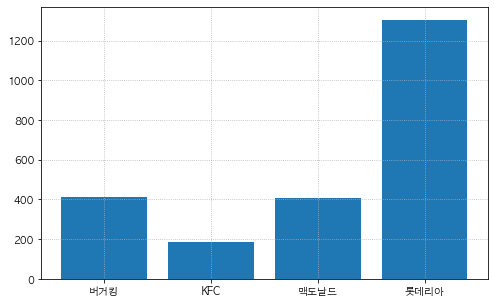

In [23]:
fig = plt.figure(figsize=(8,5))
plt.bar(brand_df.sum().index, brand_df.sum())
plt.grid(True, linestyle=':')

In [24]:
# 수치로 확인
brand_df.corr()

,버거킹,KFC,맥도날드,롯데리아
버거킹,1.000000,0.740527,0.831703,0.786932
KFC,0.740527,1.000000,0.743651,0.566187
맥도날드,0.831703,0.743651,1.000000,0.749720
롯데리아,0.786932,0.566187,0.749720,1.000000


In [25]:
BMK = brand_df.to_numpy().T
BMK.shape # index - 0:버거킹, 1:KFC, 2:맥도날드, 3:롯데리아

(4, 240)

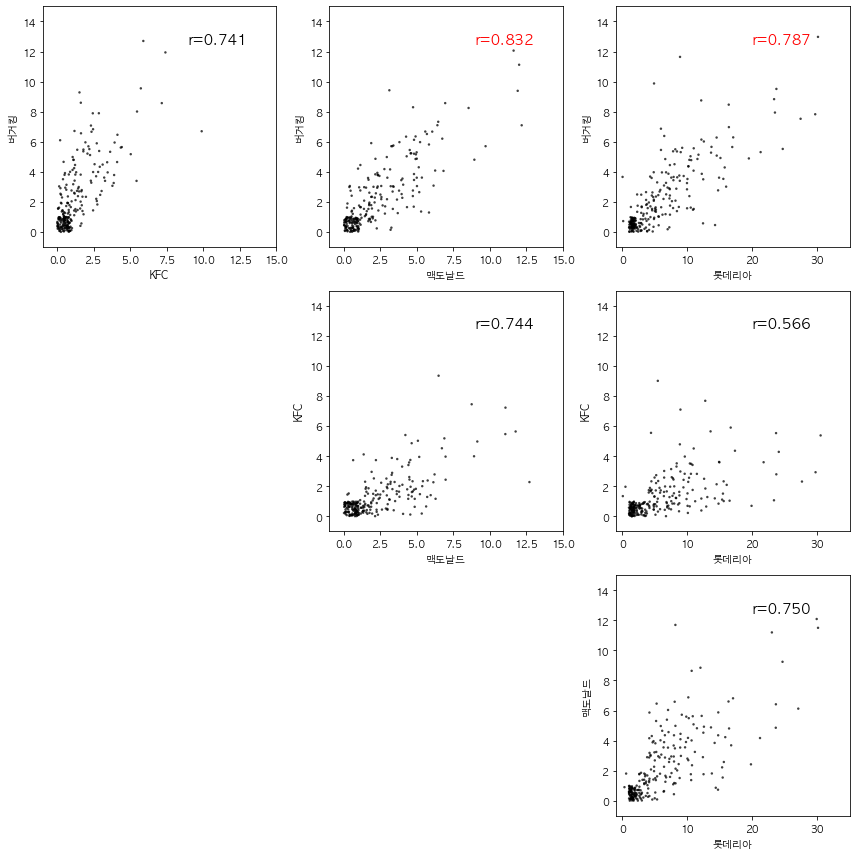

In [26]:
#매장별 상관관계 분석하기
import scipy.stats
import numpy as np

fig = plt.figure(figsize=(12,12))

def plot_nstores3(b1, b2, label1, label2):
    plt.scatter(brand_df[b1] + np.random.random(len(brand_df)),
                brand_df[b2] + np.random.random(len(brand_df)),
                edgecolor='none', alpha=0.75, s=6, c='black')
    plt.xlim(-1, 15 if (b1 != '롯데리아') & (b1 != '맘스터치') else 35)
    plt.ylim(-1, 15 if (b2 != '롯데리아') & (b2 != '맘스터치') else 35)
    plt.xlabel(label1)
    plt.ylabel(label2)

    r = scipy.stats.pearsonr(brand_df[b1], brand_df[b2])

    if r[0]>=0.75:
        color='red'
    elif r[0]<0.5:
        color='blue'
    else:
        color='black'

    plt.annotate('r={:.3f}'.format(r[0]), (9 if (b1 != '롯데리아') & (b1 != '맘스터치') else 20,
                                          12.5 if (b2 != '롯데리아') &(b2 != '맘스터치') else 20),
                 fontsize=14, color=color)
bgbrands = [
            ('버거킹', '버거킹'), ('KFC', 'KFC'),('맥도날드', '맥도날드'),('롯데리아','롯데리아')
]

for a in range(len(bgbrands) - 1):
    for b in range(1, len(bgbrands)):
        if a >= b:
            continue
        ax = fig.add_subplot(len(bgbrands)-1, len(bgbrands)-1, a * 3 + b)
        acol, alabel = bgbrands[a]
        bcol, blabel = bgbrands[b]
        plot_nstores3(bcol, acol, blabel, alabel)

plt.tight_layout()
